In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt


df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/Data%20Modeling/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Number of rows and columns

In [11]:
rows,columns=df.shape
print(f'# of rows:{rows} \n# of columns:{columns}')

# of rows:119390 
# of columns:32


## Name of the columns

In [12]:
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Optimizing Readibility -renaming 'adr' column

In [13]:
df.rename(columns={'adr':'Average Daily Rate','agent':'TravelAgencyID'},inplace=True)
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'TravelAgencyID', 'company', 'days_in_waiting_list', 'customer_type',
       'Average Daily Rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

## Check Null Values

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
TravelAgencyID                     16340
company         

Looks like there are 3 columns that need attention since they have number some number of null values.

## Null Percentage Table: 'country','agent','company'

In [15]:
null_percentage_table=df[['country','TravelAgencyID','company']]
null_percentage_table=pd.DataFrame({"Null Total":null_percentage_table.isnull().sum()})
null_percentage_table["Null Percentage"]=(null_percentage_table["Null Total"] / rows) * 100
null_percentage_table

,Null Total,Null Percentage
country,488,0.408744
TravelAgencyID,16340,13.686238
company,112593,94.306893


Company column has 94 percent of its data missing , so it would be wise to drop the column entirely. TravelAgencyID column is missing 13.6 percent and country has less than 1 percent of its data missing. We can take a bit closer look to these columns after dropping the company column

## Dropping Company Column:

In [16]:
df.drop(columns=['company'], inplace=True)
columns_name=df.columns
columns_name

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'TravelAgencyID', 'days_in_waiting_list', 'customer_type',
       'Average Daily Rate', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

Company Column has been dropped.

## Unique values table 

In [17]:
def generate_unique_value_Table():
    unique_values={}
    sum_values=[]
    for column in range(len(columns_name)):
        unique_values[columns_name[column]]=df[columns_name[column]].unique()

    unique_table=pd.DataFrame({"Unique Values": unique_values})
    unique_table=unique_table.reset_index()
    unique_table.rename(columns={'index':'Column Names'}, inplace='True')
    unique_table

    for i in unique_table['Unique Values'][:]:
        sum_values.append(len(i))


    unique_table['Sum of Unique Values']=sum_values
    return unique_table
table=generate_unique_value_Table()
table

,Column Names,Unique Values,Sum of Unique Values
0,Average Daily Rate,"[0.0, 75.0, 98.0, 107.0, 103.0, 82.0, 105.5, 1...",8879
1,TravelAgencyID,"[nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2...",334
2,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",14
3,arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
4,arrival_date_month,"[July, August, September, October, November, D...",12
5,arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",53
6,arrival_date_year,"[2015, 2016, 2017]",3
7,assigned_room_type,"[C, A, D, E, G, F, I, B, H, P, L, K]",12
8,babies,"[0, 1, 2, 10, 9]",5
9,booking_changes,"[3, 4, 0, 1, 2, 5, 17, 6, 8, 7, 10, 16, 9, 13,...",21


### Clarification on ambiguous values:
- BB = Breakfast and beverages
- FB = Full board (bed, breakfast, lunch, evening meal – no drinks included in the evening)
- HB = Half board (bed, breakfast, evening meal – no drinks included in the evening) 
- SC = Service Charge Food 
- TA= Travel Agency
- TO= Travel Operators

## Background Information:

What is the ADR or Average Daily Rate in hotel industry?

- The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day. The average daily rate is one of the key performance indicators (KPI) of the industry.

**Example**: 
        If a hotel has 50,000 dollars in room revenue and 500 rooms sold, the ADR would be 100 dollars ($50,000/500).Rooms  used for in-house use, such as those set aside for hotel employees and complimentary ones, are excluded from the           calculation
        


In [19]:
df['meal'].replace("BB","Breakfast",inplace=True)
df['meal'].replace("FB","Full Board",inplace=True)
df['meal'].replace("HB","Half Borad",inplace=True)
df['meal'].replace("SC","Surcharge",inplace=True)
df['meal'].replace("Undefined","Breakfast",inplace=True)
df['distribution_channel'].replace("Undefined",'Direct',inplace=True)


df['meal'].value_counts()
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14650
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

## Replacing missing "Travel Agency IDs" with 0 

In [20]:
df['TravelAgencyID']=df['TravelAgencyID'].replace(np.nan,0)

In [21]:
print(f"Number of null values in TravelAgencyID: {df['TravelAgencyID'].isnull().sum()}")

Number of null values in TravelAgencyID: 0


## Replacing missing "children entry" with 0

In [22]:
df['TravelAgencyID']=df['children'].replace(np.nan,0)

## Dropping rows with missing "country entry"

In [23]:
df = df.dropna(subset=['country'])

In [24]:
print(f"Number of null values in country column: {df['country'].isnull().sum()}")

Number of null values in country column: 0


## Statistical Information Of The Data

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,TravelAgencyID,days_in_waiting_list,Average Daily Rate,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118898.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104207,0.007948,0.032010,0.087139,0.131629,0.221174,0.104203,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399172,0.097379,0.176026,0.845855,1.484647,0.652775,0.399166,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,10.000000,391.000000,5400.000000,8.000000,5.000000


## Data Types

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

## Correlation Matrix

<AxesSubplot:>

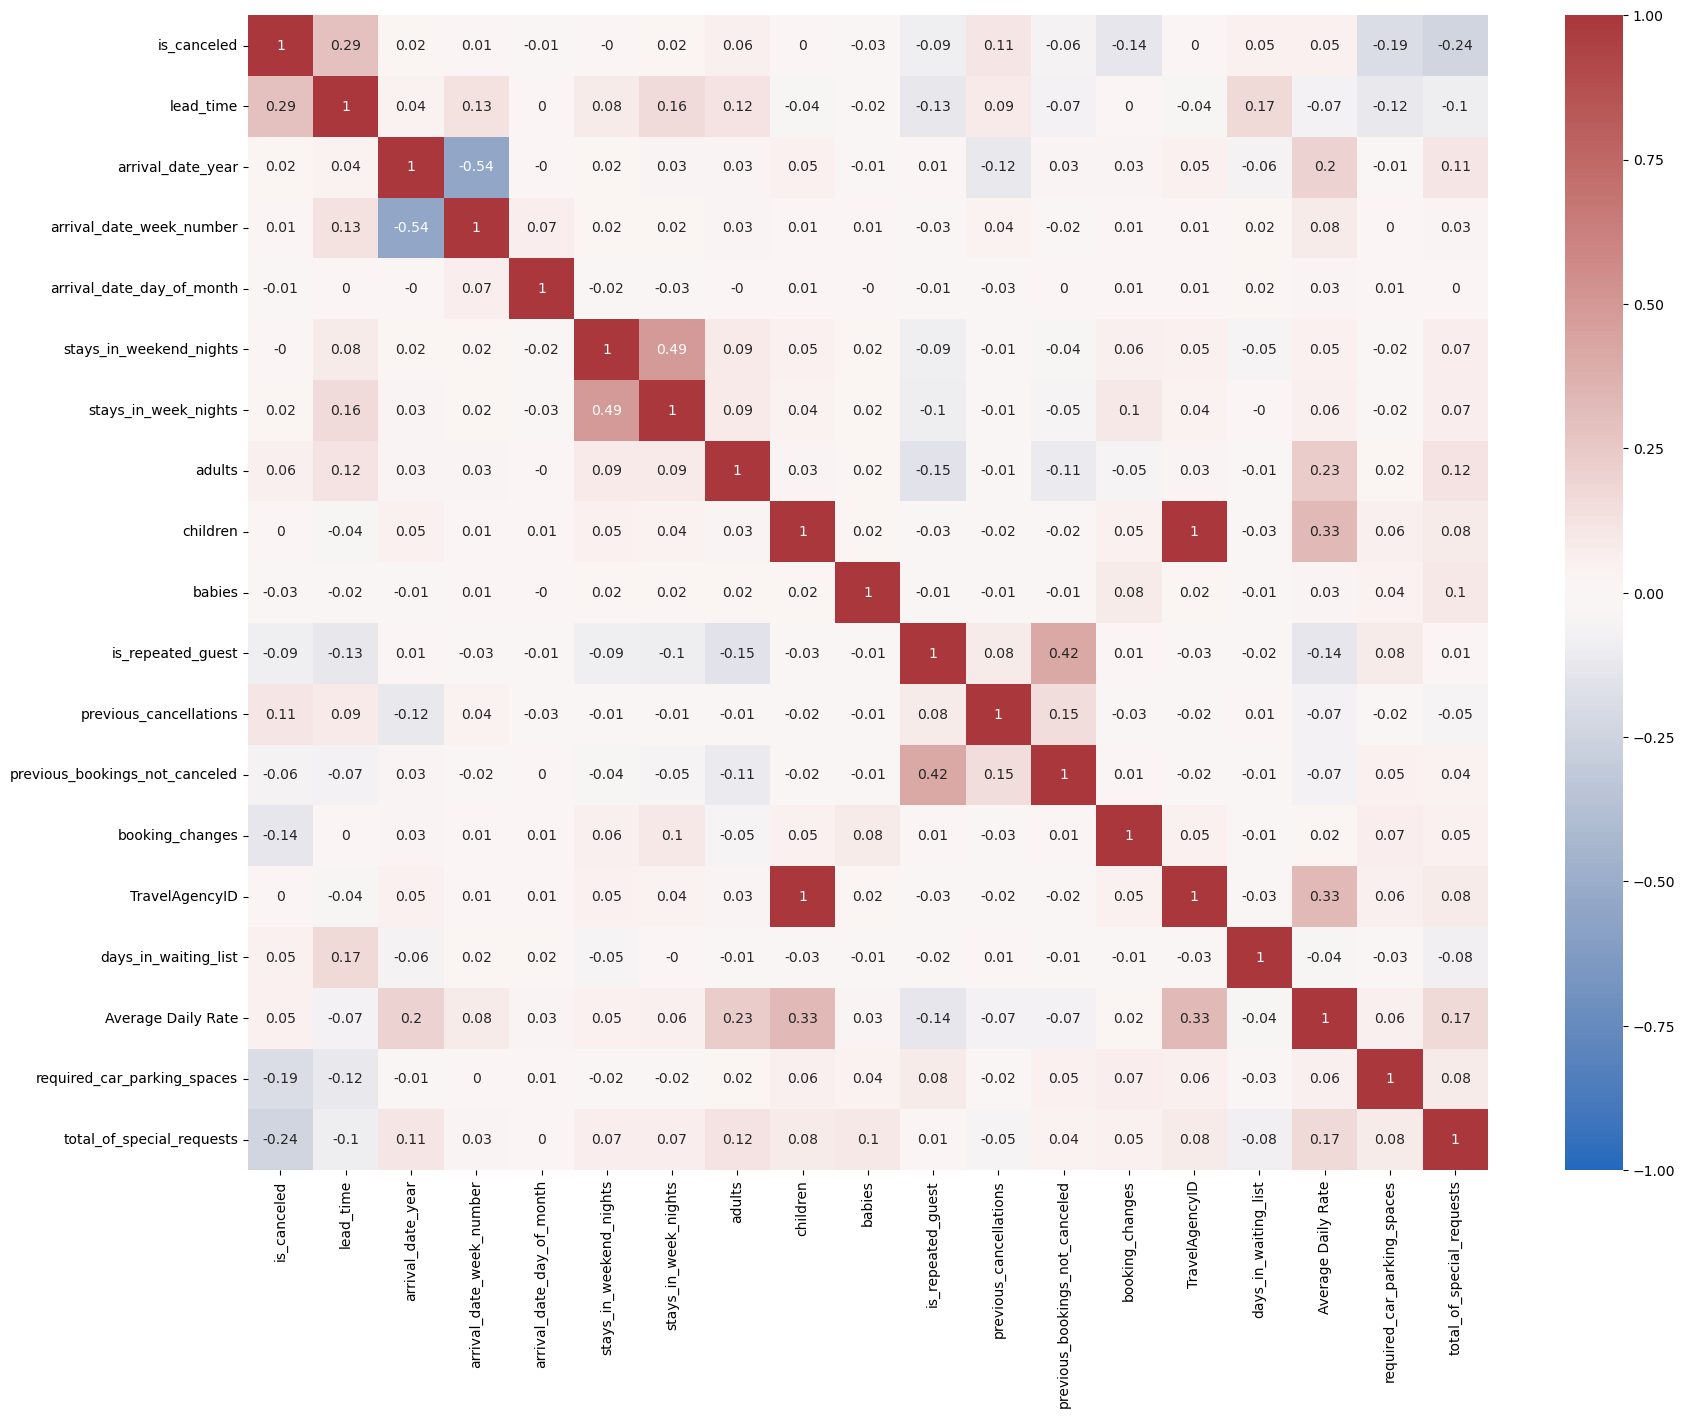

In [27]:
plt.subplots(figsize=(20,15))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,cmap='vlag',)

To better read the above correlation matix, it would be a better idea to enhance its readibility . The upper part of matrix looks redundant as it contains repititive values in the matix. 

## Enhacning correlation matrix readbility 

In [28]:
matrix=df.corr().round(2)

# np.triu: numpy function making the upper triangle of matrix True and the rest Falsee
# np.ones_like(matrix,dtype) numpy function returns array of one with the same shape of the given matrix
mask=np.triu(np.ones_like(matrix,dtype=bool))


<AxesSubplot:>

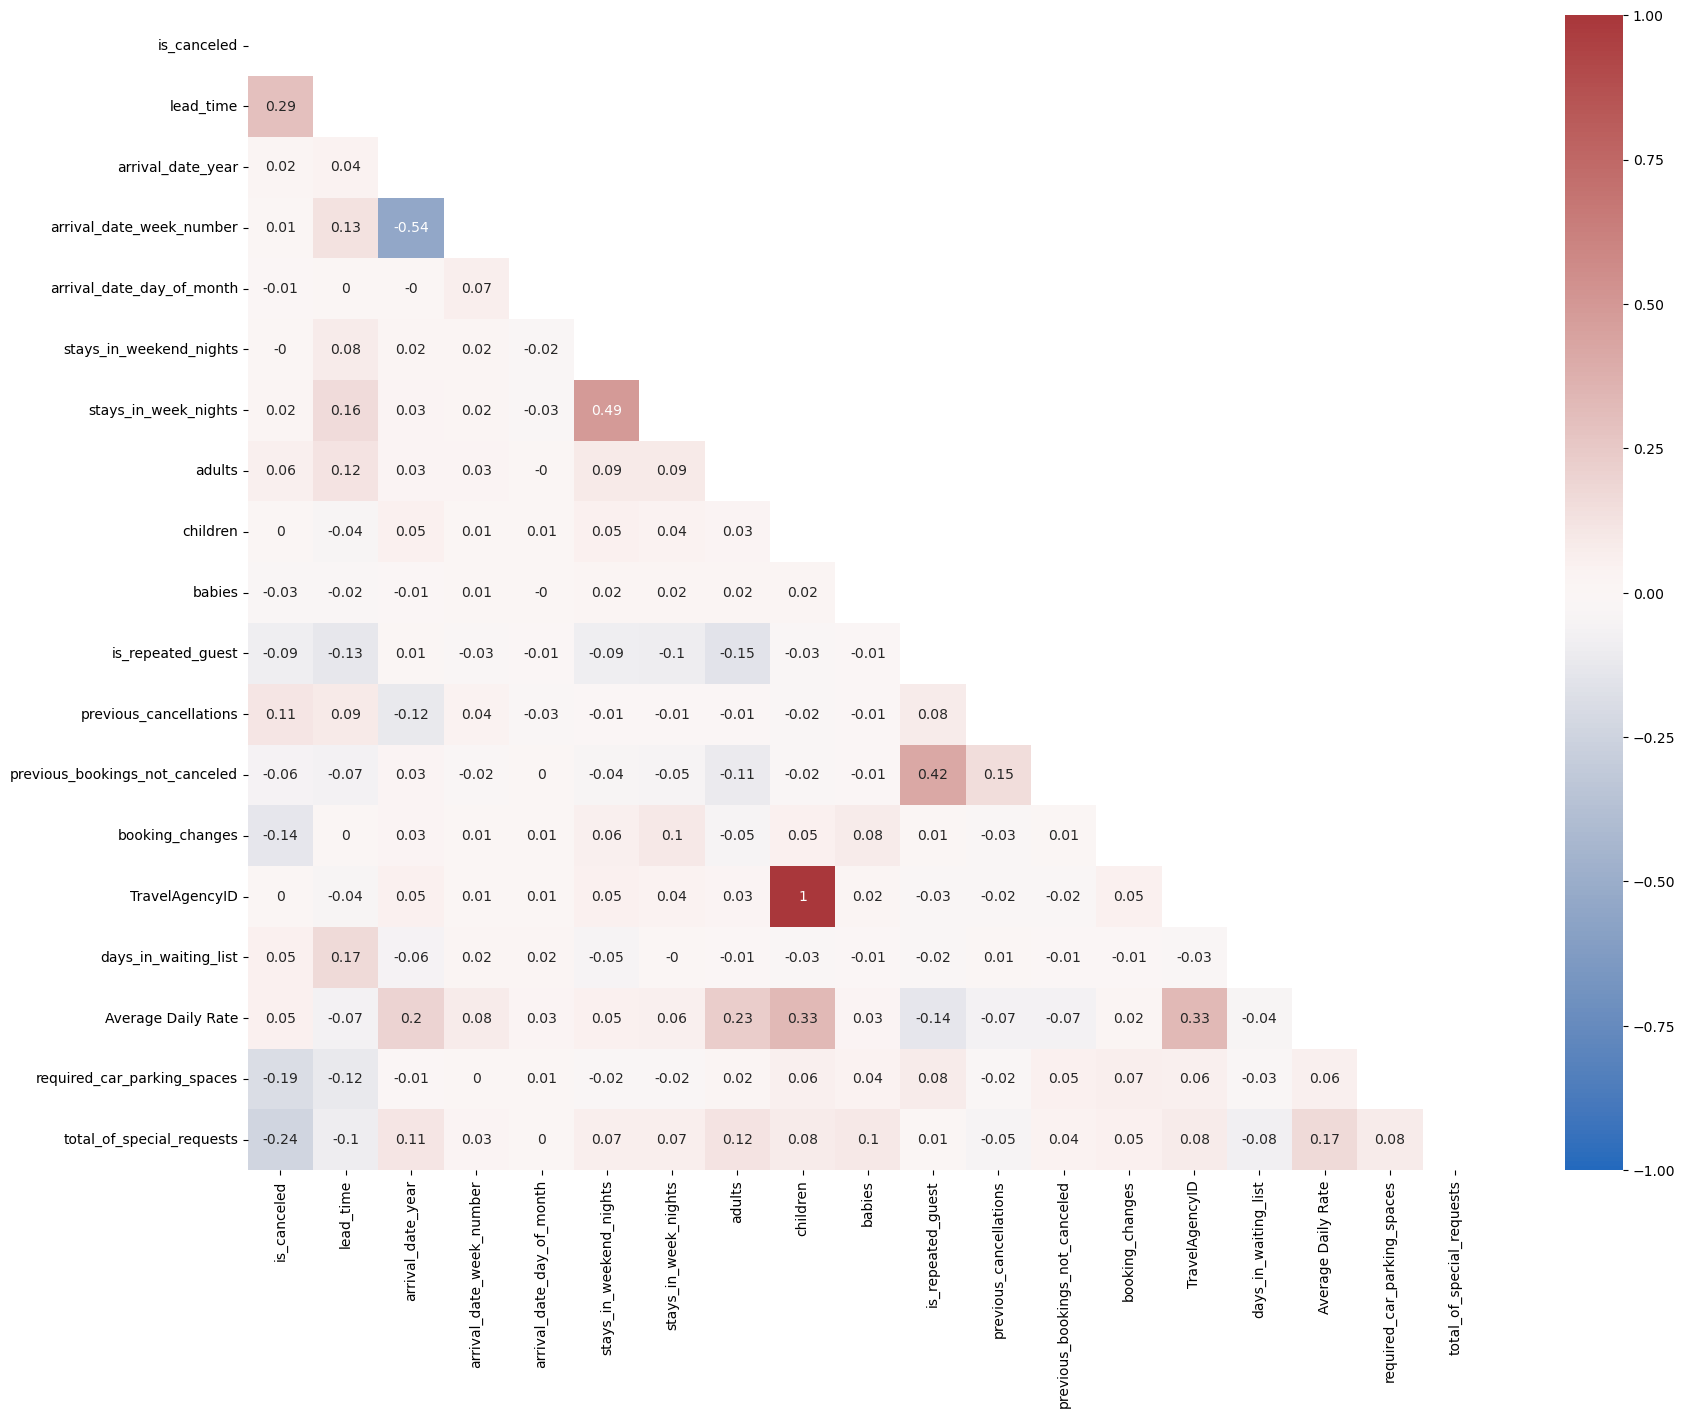

In [29]:
plt.subplots(figsize=(20,15))
sns.heatmap(matrix,annot=True,vmax=1,vmin=-1,cmap='vlag',mask=mask)

The matrix looks much better as the redundant values are off the matrix.
Looking at matrix,we see the strongest correlation in the dataset is ***0.49 which is between the relation between stays_in_week_night & stay in weekend nights***. If a hotel has booking in the week days ,it will have booking in the weekends. The next interesting correlation is ***previous_booking_not_canceled & repeated guess,0.42***. It would be interesting to see what factors effect this trend.Other notable relation are **average daily rate & children (0.33),lead time & is canceled(0.29)**.

## Category Visualization- Pie Chart

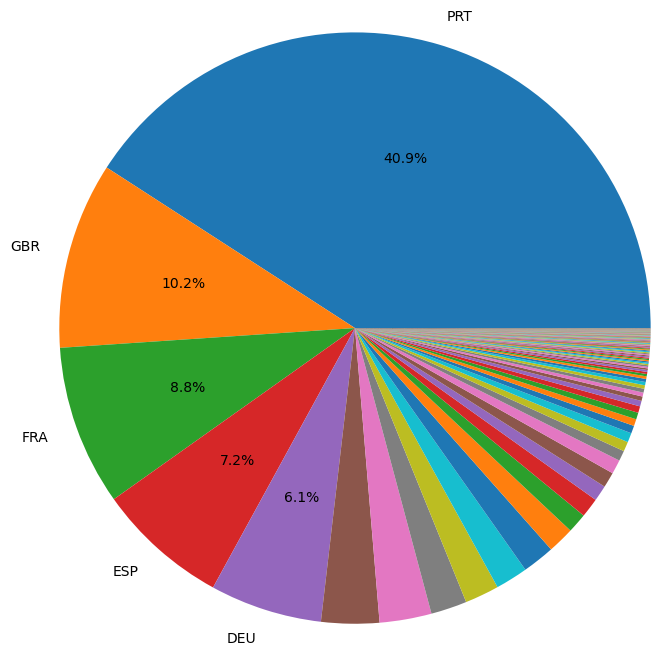

In [30]:
fig, ax = plt.subplots()
country_table=df['country'].value_counts()
values=country_table.values
labels=country_table.index
# labels
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%',radius=2.0)
threshold = 5
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) < threshold:
        label.set_text('')
        pct_label.set_text('')
plt.show()

- PRT(Portugal): 40.9 %
- GBR (United Kingdom) : 10.2%
- FRA (France): 8.8%
- ESP (Spain):7.2%
- DEU (Germany): 6.1%

An interesting insight is that now we know the majority of the data is for European countries.

## Visualization - Number of city vs. resort hotel

In [31]:
hotel_type=df['hotel'].value_counts()
hotel_type

City Hotel      79306
Resort Hotel    39596
Name: hotel, dtype: int64

## City Hotel vs. Resort Hotel

Text(0.5, 1.0, 'Hotel Type vs. Sum of Hotel')

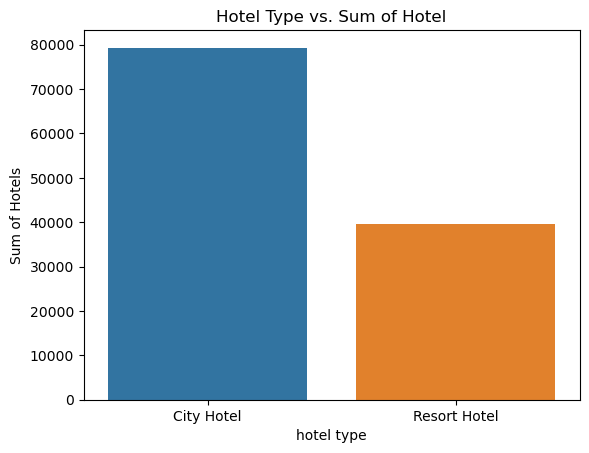

In [32]:
sns.barplot(x=hotel_type.index,y=hotel_type.values)
plt.xlabel("hotel type")
plt.ylabel("Sum of Hotels")
plt.title("Hotel Type vs. Sum of Hotel")

## Hotel-Pivot Table

In [33]:
hotel_table=df[['hotel','is_canceled','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','booking_changes','Average Daily Rate','arrival_date_month']]
pd.pivot_table(df,index='hotel',values='is_canceled',aggfunc=['sum','mean'])

,sum,mean
,is_canceled,is_canceled
hotel,,
City Hotel,33080,0.417119
Resort Hotel,11077,0.279750


This table shows meaningful insights. When comparing the type of hotel we see cancelations are almost 2 time more for the city hotel compared to resort hotel. Another interesting fact is the booking changes value: 0.18(city hotel) vs  resort hotel(0.28).

In [175]:
hotel_month=pd.pivot_table(df,index='hotel',columns='arrival_date_month',values='is_canceled',aggfunc=['sum'])
hotel_month

sum                                                     \
arrival_date_month April August December February January  July  June March   
hotel                                                                         
City Hotel          3461   3602     1737     1901    1482  3306  3528  2386   
Resort Hotel        1051   1636      626      794     324  1430  1006   762   

                                                     
arrival_date_month   May November October September  
hotel                                                
City Hotel          3653     1660    3254      3110  
Resort Hotel        1024      460     974       990

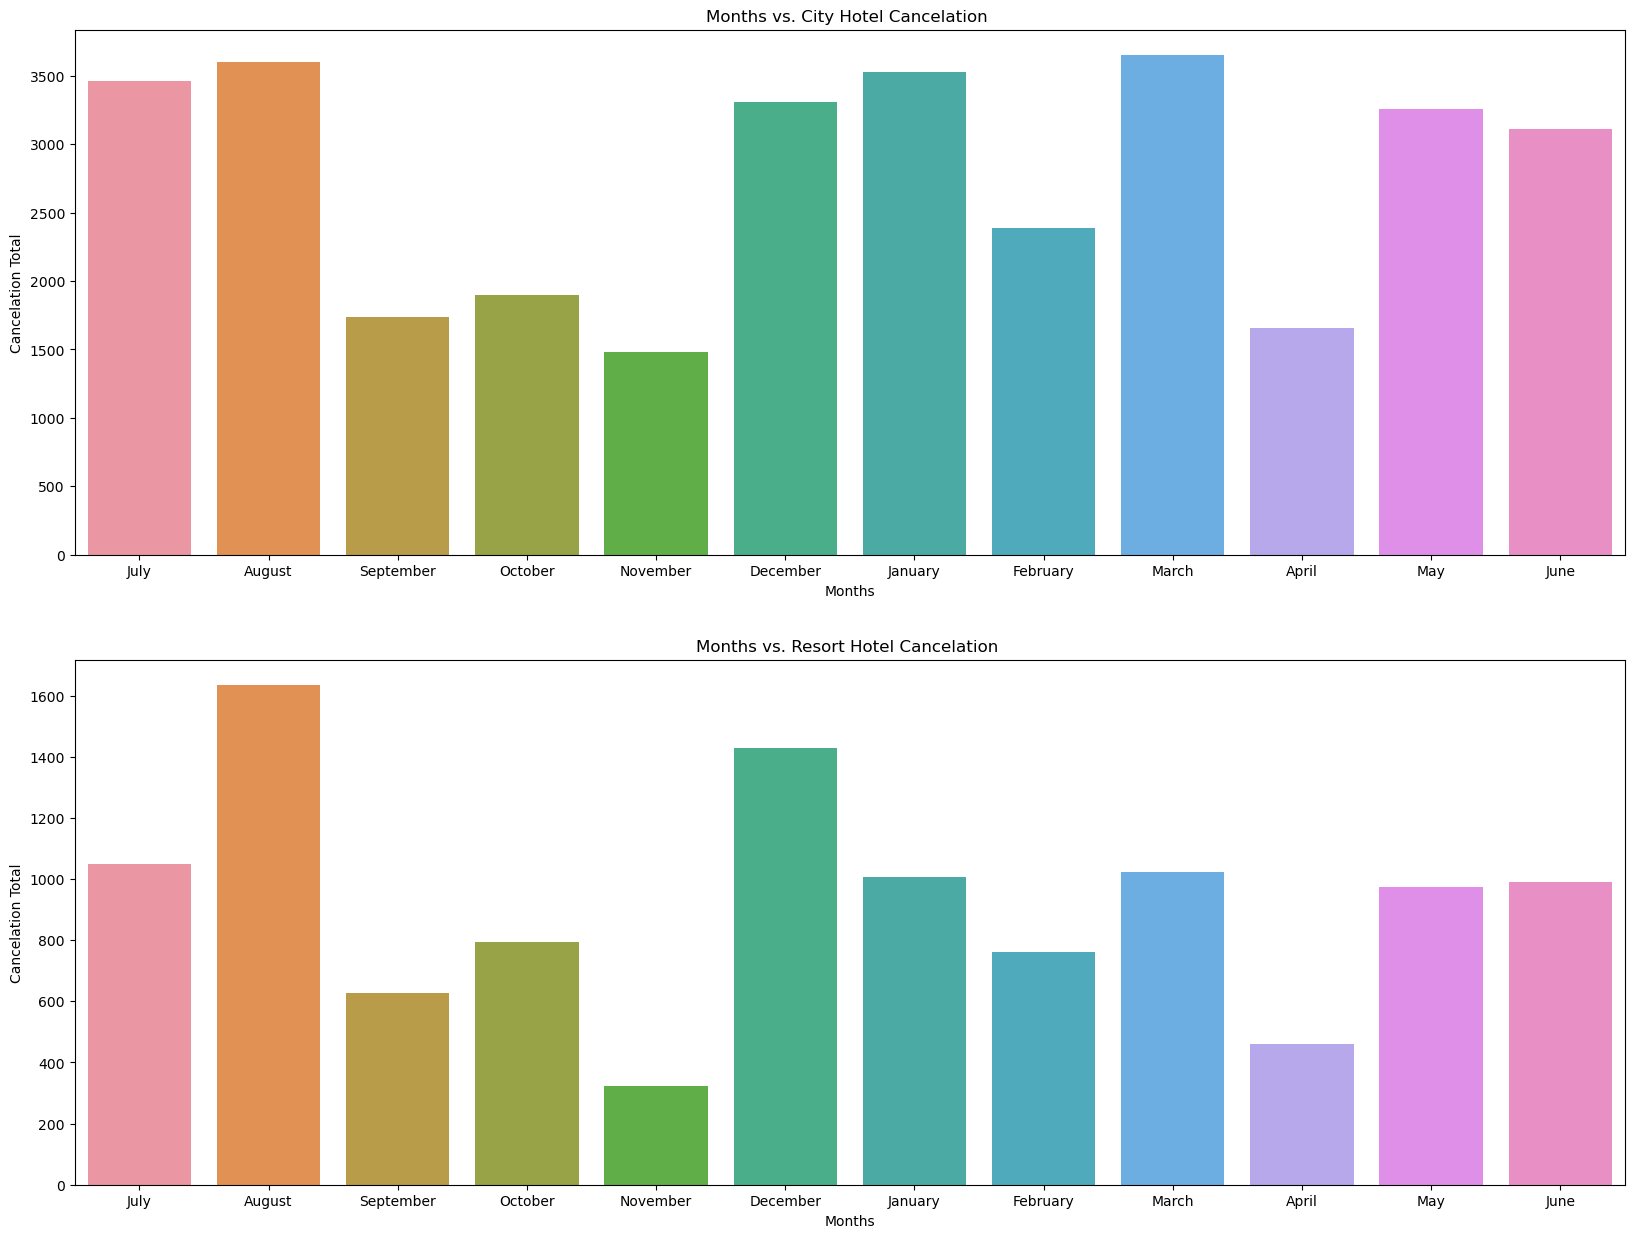

In [35]:
figure, (ax1,ax2) = plt.subplots(2, 1,figsize=(20,15))
months=df['arrival_date_month'].unique()
hotel_types=df['hotel'].unique()
sns.barplot(x=months,y=hotel_month.values[0],data=hotel_table,ax=ax1)
ax1.set_title("Months vs. City Hotel Cancelation ")
ax1.set_xlabel("Months")
ax1.set_ylabel("Cancelation Total")


sns.barplot(x=months,y=hotel_month.values[1],data=hotel_table,ax=ax2)
ax2.set_title("Months vs. Resort Hotel Cancelation ")
ax2.set_xlabel("Months")
ax2.set_ylabel("Cancelation Total")


plt.show()

The lowest month cancelation month is November, followed by April. However, since there are less number of resort table in the data set overall we have less cancelation when we do month-month comparison. 

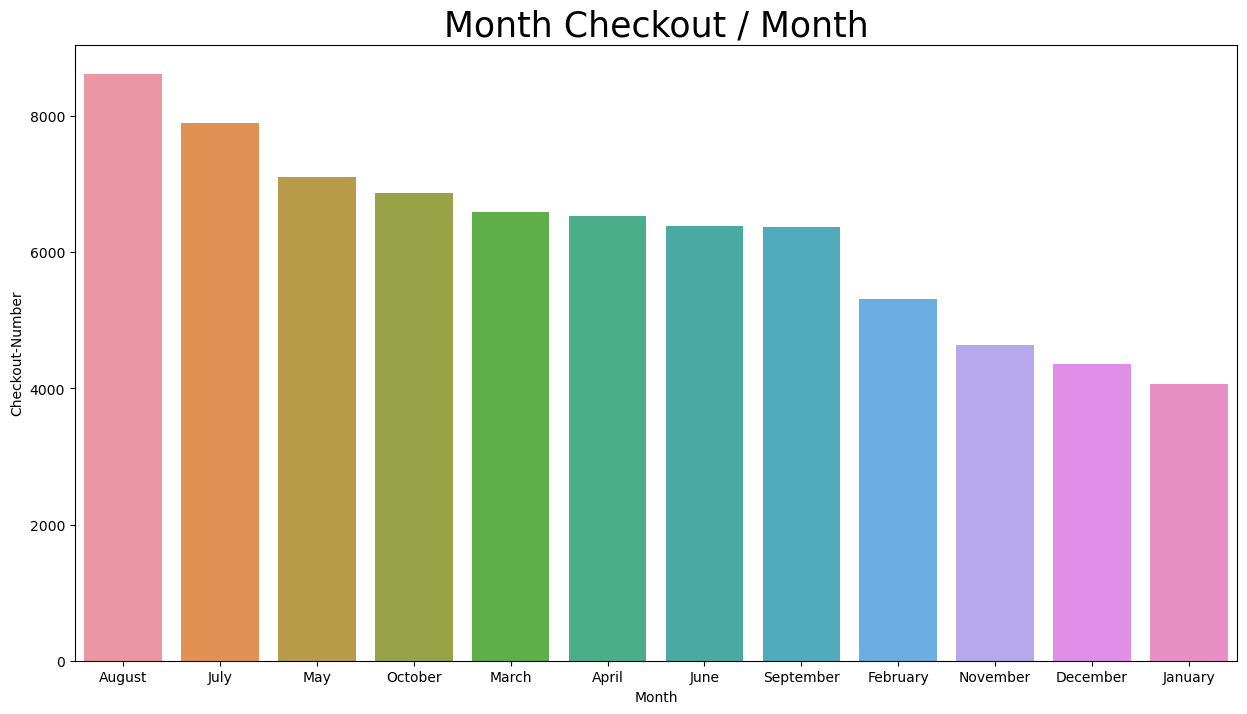

In [207]:
check_out_month=df[df['reservation_status']=='Check-Out']
check_out_month=check_out_month['arrival_date_month'].value_counts()
highest_month=pd.DataFrame({"Checkout-Number":check_out_month})
highest_month.reset_index(inplace=True)
highest_month.rename(columns={"index":"Month"},inplace=True)
highest_month.sort_values(by='Checkout-Number',ascending=False)

plt.subplots(figsize=(15,8))
sns.barplot(x=highest_month['Month'],y=highest_month['Checkout-Number'])

plt.title("Month Checkout / Month", fontsize = 25)
plt.show()

The 3 busiest months in the year is in summer(August, and July, May), along with October which has holidays like Thanksgiving in it. 

In [228]:
df['arrival_date_month']=df['arrival_date_month'].astype('category')
check_out_city=df.copy(deep=True)
check_out_resort=df.copy(deep=True)

check_out_city=check_out_city[(check_out_city['hotel'] =='City Hotel') & (check_out_city['reservation_status'] =='Check-Out')  ]
average_month=check_out_city.groupby(by=check_out_city["arrival_date_month"]).mean()
average_month=average_month['Average Daily Rate'].sort_values(ascending=False)
adr_city_frame=pd.DataFrame({"City-ADR Mean":average_month}).reset_index()
adr_city_frame


,arrival_date_month,City-ADR Mean
0,May,120.445842
1,August,118.412083
2,June,117.702075
3,July,115.563810
4,September,112.598452
5,April,111.856824
6,October,101.745956
7,March,90.170722
8,December,87.856764
9,November,86.499714


In [229]:
adr_city_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   arrival_date_month  12 non-null     category
 1   City-ADR Mean       12 non-null     float64 
dtypes: category(1), float64(1)
memory usage: 632.0 bytes


In [242]:
check_out_resort=check_out_resort[(check_out_resort['hotel'] =='Resort Hotel') & (check_out_resort['reservation_status'] =='Check-Out')]
resort_month=check_out_resort.groupby(by=check_out_resort["arrival_date_month"]).mean()
average_month=resort_month['Average Daily Rate'].sort_values(ascending=False)
adr_resort_frame=pd.DataFrame({"Resort-ADR Mean":average_month}).reset_index()
adr_resort_frame

,arrival_date_month,Resort-ADR Mean
0,August,181.348715
1,July,150.483553
2,June,108.079808
3,September,96.288897
4,May,76.734804
5,April,76.176140
6,December,68.544415
7,October,61.883818
8,March,57.362727
9,February,54.468180


## Converging two frame

In [251]:
merge_frame=adr_city_frame.merge(adr_resort_frame,on='arrival_date_month')
merge_frame_sorted = merge_frame.sort_values(by='arrival_date_month')
merge_frame_sorted

,arrival_date_month,City-ADR Mean,Resort-ADR Mean
5,April,111.856824,76.176140
1,August,118.412083,181.348715
8,December,87.856764,68.544415
10,February,86.183025,54.468180
11,January,82.160634,48.940000
3,July,115.563810,150.483553
2,June,117.702075,108.079808
7,March,90.170722,57.362727
0,May,120.445842,76.734804
9,November,86.499714,48.857683


In [260]:
import plotly.express as px

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
merge_frame['arrival_date_month'] = pd.Categorical(merge_frame['arrival_date_month'], categories=months_order, ordered=True)

# Sort by the 'arrival_date_month' column
merge_frame_sorted = merge_frame.sort_values(by='arrival_date_month')
merge_frame_sorted

# plot(x1, y1, 'bo')
# plot(x2, y2, 'go')

px.line(merge_frame_sorted, x = 'arrival_date_month', y = ['City-ADR Mean','Resort-ADR Mean'],title = 'Room price per night over the Months', template = 'plotly_dark')

## Histograms-Categorical Attributes

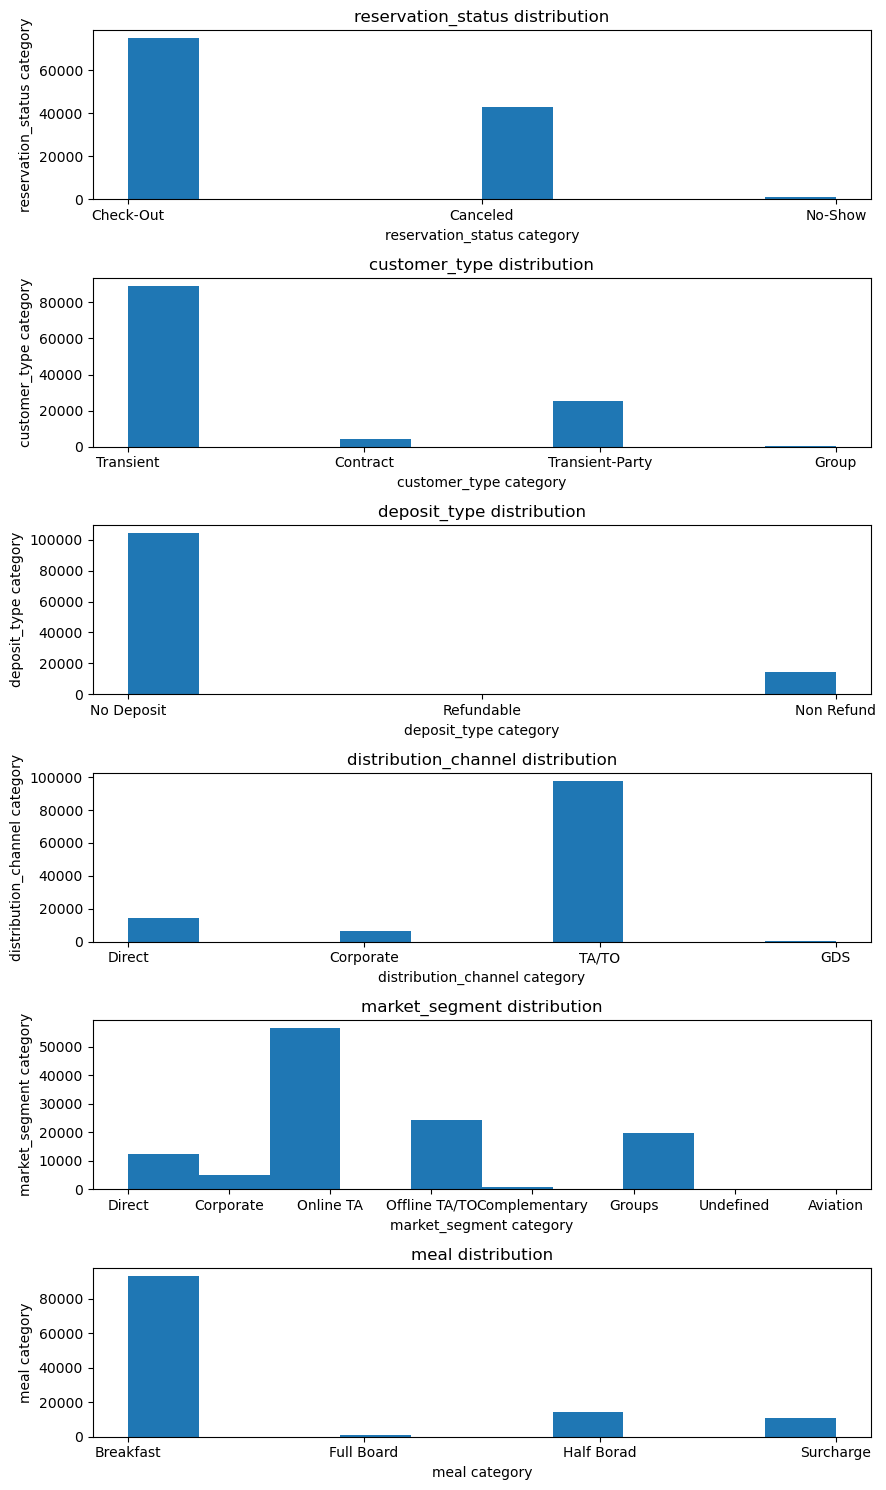

In [36]:
fig,axes=plt.subplots(6,1,figsize=(9,15))
categorical_labels=['reservation_status','customer_type','deposit_type','distribution_channel','market_segment','meal']

def generate_histogram(categorical_labels,df):
    for i in range(len(categorical_labels)):
        axes[i].hist(df[categorical_labels[i]])

def generate_histogram_title(categorical_labels):
    for i in range(len(categorical_labels)):
        axes[i].set_title(f"{categorical_labels[i]} distribution")


def generate_histogram_xlabel(categorical_labels):    
    for i in range(len(categorical_labels)):
        axes[i].set_xlabel(f"{categorical_labels[i]} category")
        
        
def generate_histogram_ylabel(categorical_labels):    
    for i in range(len(categorical_labels)):
        axes[i].set_ylabel(f"{categorical_labels[i]} category")   
 

generate_histogram(categorical_labels,df)
generate_histogram_title(categorical_labels)
generate_histogram_xlabel(categorical_labels)
generate_histogram_ylabel(categorical_labels)







plt.tight_layout()
plt.show()

## Insights:

- Majority of market segment comes from the Online TA(Travel Agency).It would be interesting to see the progress of individual segments over time. Generally online platform have became popular in all the industries. 

- Another interesting fact from the above histgrams is the meal distribution of the hotel. We see a general trend where hotel serves only Breakfast. 

- Majority of booking require no deposit, which is surprising. The other interesting fact is that almost none of the deposits are refundable. It would be interesting to look at the correlation between Non-Refundable deposit and Cancelation column. 

- Reservation status distribution shows most number of non-cancel reservation or Check-Out is more than canceled reservation.

## Boxplot

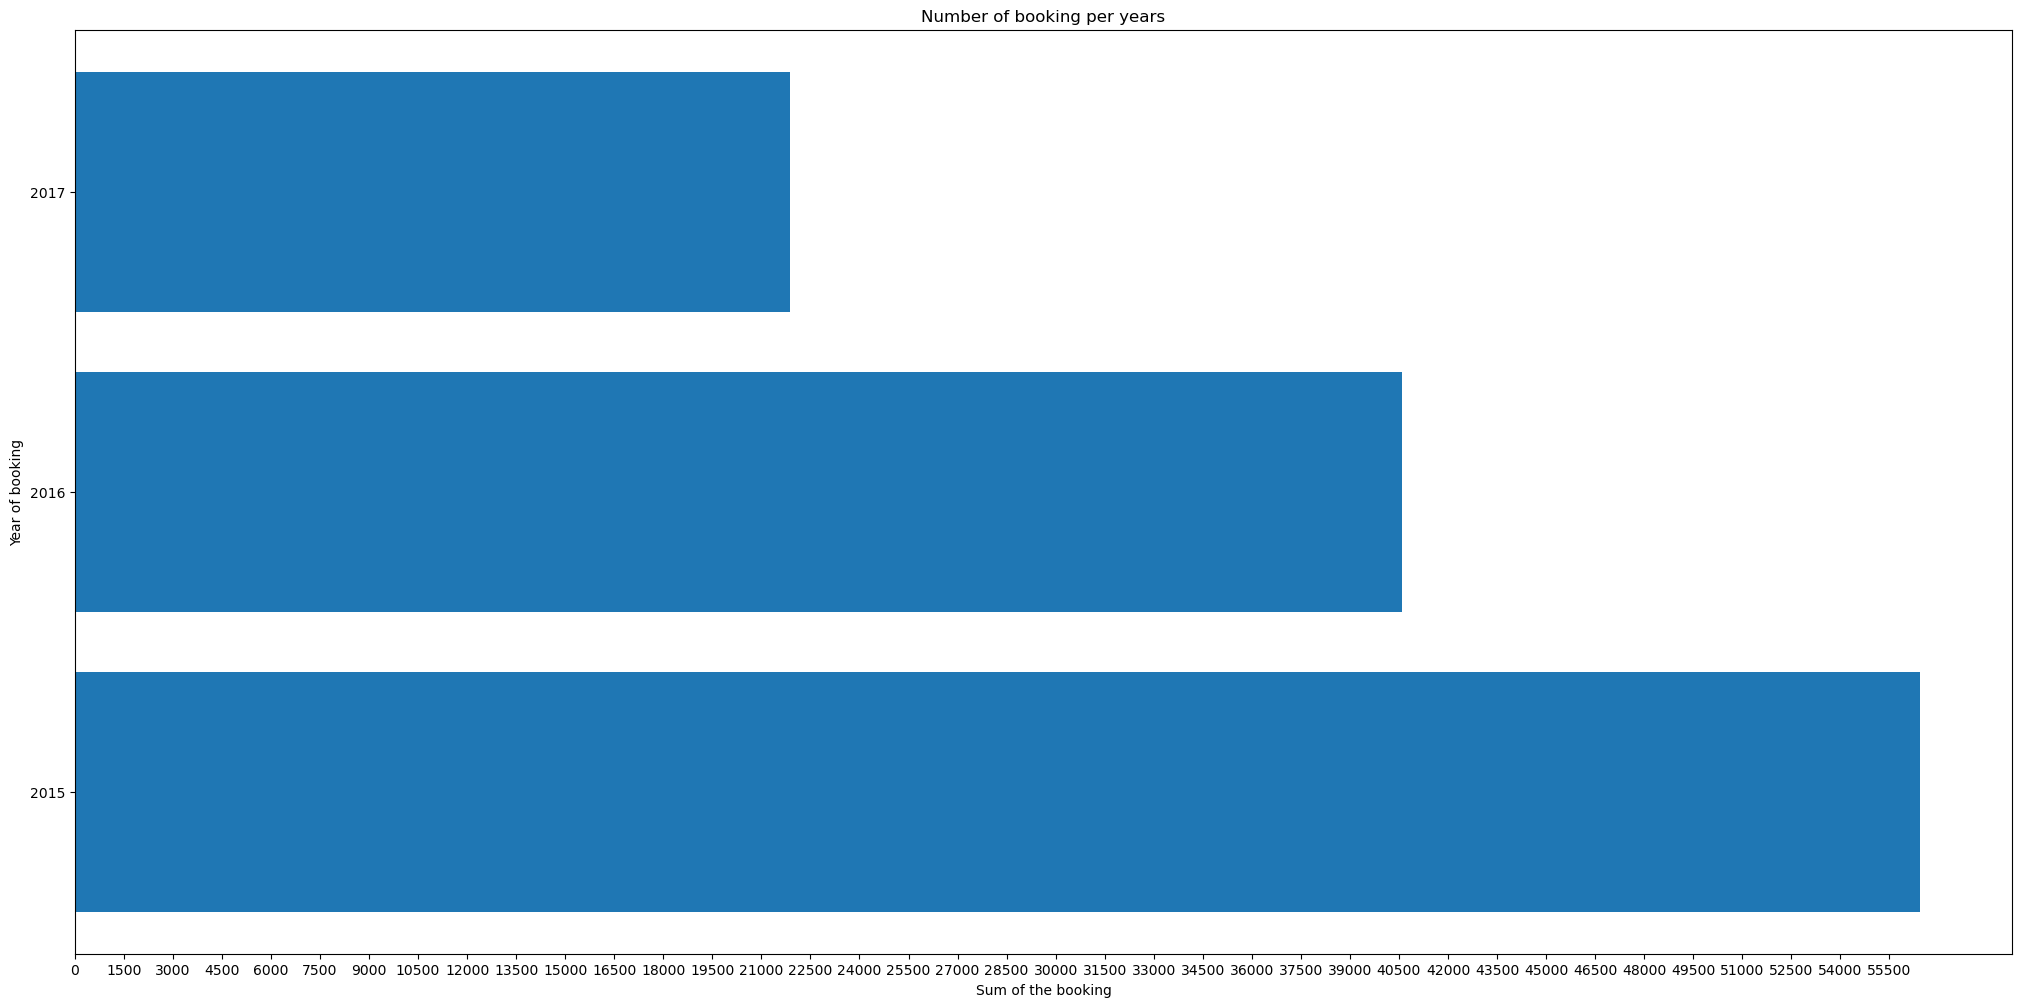

In [37]:
plt.subplots(figsize=(25,12))
plt.barh([2015,2016,2017],df['arrival_date_year'].value_counts())
plt.yticks([2015,2016,2017])
plt.xticks(np.arange(0,df['arrival_date_year'].value_counts().max(),1500))
plt.title("Number of booking per years")
plt.xlabel("Sum of the booking")
plt.ylabel("Year of booking")
plt.show()

## Meal Category & Repeated Guest

One of the factor that would change a traveler opinion about the hotel is the quiality of the food the hotel serve. The meal hotel serves is a key factor for anyone booking the hotel. Now, the expectation is the better hotel meal plan is, there is more chance for the guest to come back. Let's dive into a deeper insight to check on this expectation. 

In [38]:
temp_table=df[["meal","is_canceled","adults","children","babies","is_repeated_guest","previous_cancellations"]]
temp_table=temp_table.groupby(by="meal").sum()
temp_table

,is_canceled,adults,children,babies,is_repeated_guest,previous_cancellations
meal,,,,,,
Breakfast,34742,171802,10382.0,703,3501,7259
Full Board,478,1563,78.0,24,9,1251
Half Borad,4981,27900,1743.0,181,186,1738
Surcharge,3956,19703,187.0,37,110,113


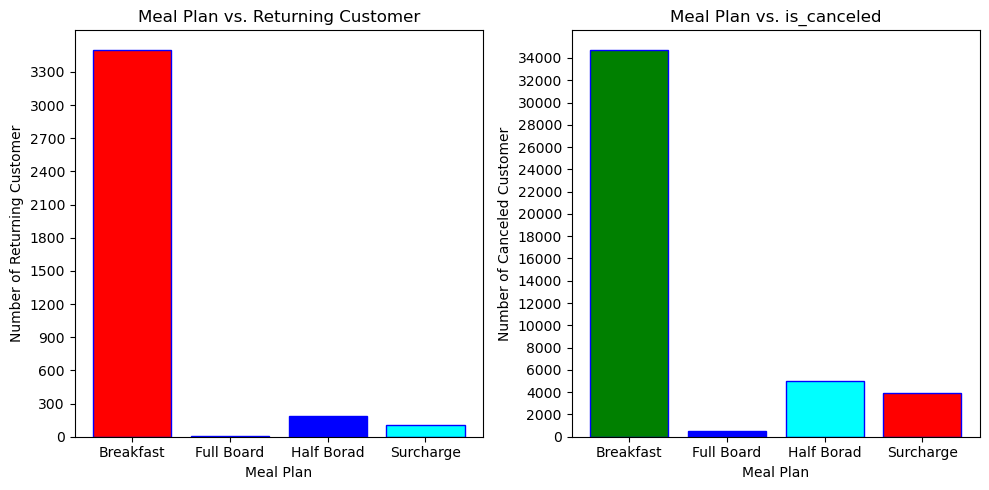

In [39]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].bar(x=temp_table.index,height=temp_table['is_repeated_guest'],color=['red', 'green', 'blue', 'cyan'],edgecolor='blue')
ax[0].set_title("Meal Plan vs. Returning Customer")
ax[0].set_xlabel("Meal Plan")
ax[0].set_ylabel("Number of Returning Customer")
ax[0].set_yticks(np.arange(0, temp_table['is_repeated_guest'].values.max(),300))


ax[1].bar(x=temp_table.index,height=temp_table['is_canceled'],color=['green', 'blue', 'cyan','red'],edgecolor='blue')
ax[1].set_title("Meal Plan vs. is_canceled")
ax[1].set_xlabel("Meal Plan")
ax[1].set_ylabel("Number of Canceled Customer")

categories=temp_table.index

ax[1].set_yticks(np.arange(0, temp_table['is_canceled'].values.max(),2000))
plt.tight_layout()
plt.show()

Both the table and bar graph confirm our expectation. Although we see a confirmation, however it is not a good idea to quickly make a conclusion. Because, majority of the hotels only offer Break as their meal plan.It could have been helpful if we had breakfast rating of the resturaunt. That way we could have seen a correlation between breakfast quality of the hotel and number of returning customers or number of cancelation that the customer get. 

## average daily rate:

Text(0.5, 1.0, 'Average Daily Rate Boxplot')

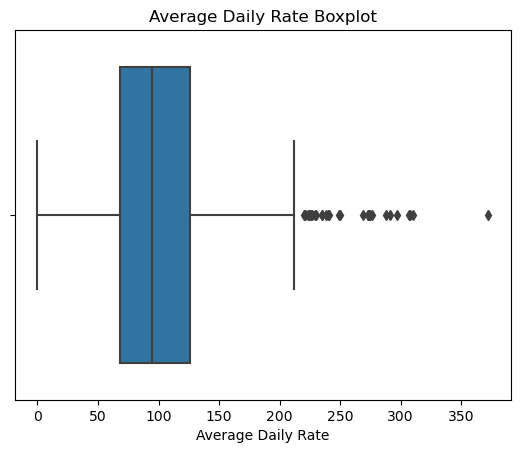

In [54]:
sns.boxplot(x=df['Average Daily Rate'].sample(1000))
plt.title("Average Daily Rate Boxplot")

The minimum average daily rate(ADR)  is 0, which is not a normal ADR. Most of the data ranges from 50 to 140 ADR. The higher ADR means higher price per room of the hotel. Room price could be due to various factors such as time of the year,location of the hotel, type of distribution channel,market segments and more. 

In [174]:
df[df['Average Daily Rate']>=200]
high_adr=df[['Average Daily Rate','market_segment','distribution_channel','hotel','country','arrival_date_month']]
high_adr.groupby(by=['country','distribution_channel']).mean().sort_values(by='Average Daily Rate',ascending=False).head(20)

,,Average Daily Rate
country,distribution_channel,
AND,Direct,354.000000
ISL,Direct,295.000000
DJI,TA/TO,273.000000
AIA,TA/TO,265.000000
BGD,Direct,259.290000
ARM,Direct,251.700000
JOR,Direct,220.000000
DZA,Direct,204.000000
UMI,TA/TO,200.000000


## Sources  
1.  https://www.investopedia.com/terms/a/average-daily-rate.asp#:~:text=The%20average%20daily%20rate%20(ADR)%20is%20a%20metric%20widely%20used,(KPI)%20of%20the%20industry.

2. https://www.roomdex.io/how-to-increase-a-low-adr-average-daily-rate/#:~:text=Upsell%20hotel%20services%20and%20amenities.&text=Early%20check%2Din%20and%20late,and%20tickets%20to%20local%20events.